python code and some explination: https://youtu.be/HDUzBEG1GlA

https://youtu.be/1n5XPFcvxds?list=PLqM7alHXFySEaZgcg7uRYJFBnYMLti-nh

1.adjacency matrix: can be used to represent graph(4:56). 2.adjacency list: a linked list can be used to represent a graph(8:56). see the advantages and limitations of both.

from geeksforgeeks all artical(algorithms and models): https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/#introDFSnBFS

### implemeting of an un-directed graph using adjacency lists.

In [20]:
class vertex:
    def __init__(self,n):
        self.name=n
        self.neighbour=list()
    def add_neighbour(self,v):
        if v not in self.neighbour:
            self.neighbour.append(v)
            self.neighbour.sort()
            
class graph:
    vertices={} #each element: key=name of vertex, value=vertex it self(means it has name,neighbour as attributes)
    
    def add_vertex(self,v):
        if isinstance(v,vertex) and v.name not in self.vertices:
            self.vertices[v.name]=v
            return True
        else:
            return False
    def add_edge(self,u,v):
        if u in self.vertices and v in self.vertices:
            for key,value in self.vertices.items():
                if key==u:
                    value.add_neighbour(v)
                if key==v:
                    value.add_neighbour(u)
            return True
        else:
            return False
    def print_graph(self):
        for key in sorted(list(self.vertices.keys())):
            print(key+str(self.vertices[key].neighbour))
        

g=graph()
for i in range(ord('a'),ord('k')):
    g.add_vertex(vertex(chr(i)))
l=['ab','ca','pv','ij','eg','cd','bd','eg','gh','fb']
for edge in l:
    g.add_edge(edge[0],edge[1])
g.print_graph()

a['b', 'c']
b['a', 'd', 'f']
c['a', 'd']
d['b', 'c']
e['g']
f['b']
g['e', 'h']
h['g']
i['j']
j['i']


## no need to create a graph like above, since in many graph problems graph is already given 

below algorithms are implemented using the adjacency list type graph. when we use adjacency matrix also we we can do the same steps to make work the algorithm.

## dijkstra's algorithm

shortest path finding algorithm, the algorithm will generate the below information.

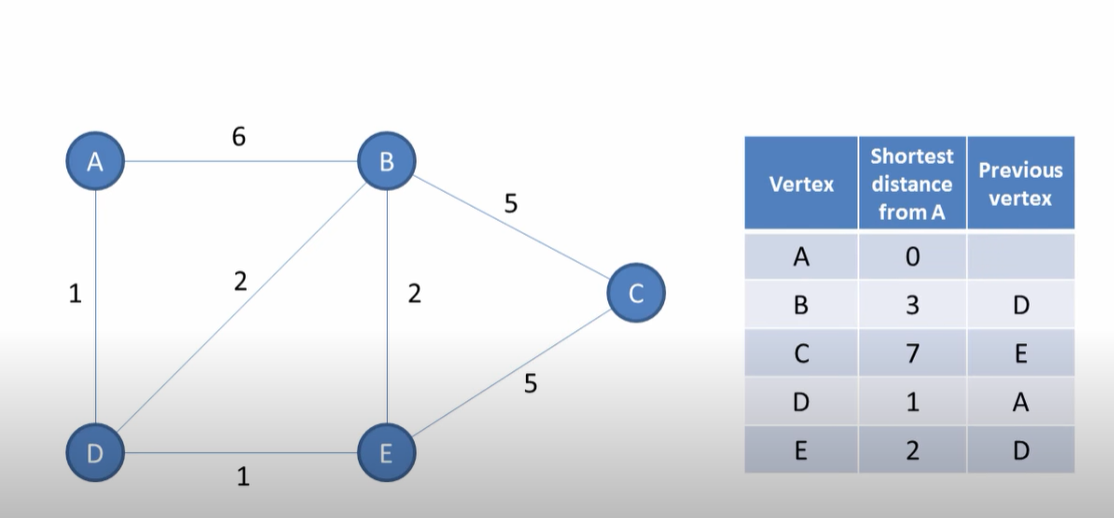

In [3]:
g1={'a':{'b':10,'c':3},'b':{'d':2,'c':1},'c':{'b':4,'d':8,'e':2},'d':{'e':7},'e':{'d':9}} #directed graph
def dijkstras(graph,start,goal):
    un_seen=graph
    inf=999999
    predecessors={}
    path=[]
    shortest_distance={}
    for node in un_seen: # setting the weight of each unseen node to inf
        shortest_distance[node]=inf
    shortest_distance[start]=0 # we set the weight of start to zero, since we start from here only.
    
    while un_seen: #runs untill all nodes are visited
        min_node=None
        for node in un_seen: #this step: from the un-seen nodes choosing the node which has the shortest distance.
            if min_node is None:
                min_node=node
            elif shortest_distance[node]<shortest_distance[min_node]:
                min_node=node
        for child_node,weight in graph[min_node].items():# this step: updating the neighbours of the min_node(our current node)
            if shortest_distance[min_node]+weight<shortest_distance[child_node]:
                shortest_distance[child_node]=shortest_distance[min_node]+weight
                predecessors[child_node]=min_node
        un_seen.pop(min_node) # after the above node gets completed the min_node is considered as visited. so we remove it.

    currentnode=goal
    while currentnode!=start: # seeing the path in the reverse order
        try:
            path.insert(0,currentnode)
            currentnode=predecessors[currentnode]
        except:
            print('no path available')
            break 
    path.insert(0,start)
    if shortest_distance[goal]!=inf:
        print('shortest path is:',shortest_distance[goal])
        print('the path is:',path)
        
dijkstras(g1,'a','d')


{'b': 'c', 'c': 'a', 'd': 'b', 'e': 'c'}
shortest path is: 9
the path is: ['a', 'c', 'b', 'd']


In [4]:
#practice
g1={'a':{'b':10,'c':3},'b':{'d':2,'c':1},'c':{'b':4,'d':8,'e':2},'d':{'e':7},'e':{'d':9}} #directed graph
def solve(g,start,end):
    un_visited=g 
    distances={}
    for c in g:
        distances[c]=99999
    distances[start]=0
    predcessors={}
    while un_visited:
        min_node=None
        for c in un_visited:
            if min_node is None:
                min_node=c 
            elif distances[min_node]>distances[c]:
                min_node=c 
        for child,weight in un_visited[min_node].items():
            if distances[child]>distances[min_node]+weight:
                distances[child]=distances[min_node]+weight
                predcessors[child]=min_node
        un_visited.pop(min_node)
    c=end
    path=[]
    while True:
        path=[c]+path 
        if c==start:
            break 
        c=predcessors[c]
    return path,distances[end]
solve(g1,'a','d')
        
                

(['a', 'c', 'b', 'd'], 9)

In [50]:
A = [  [32, 62],
        [42, 68],
        [12, 98],
        [95, 13],
        [97, 25],
        [93, 37],
        [79, 27],
        [75, 19],
        [49, 47],
        [67, 17] 
    ]
import numpy as np
m=np.zeros((100,100))
for i in A:
    m[i[0]-1,i[1]-1]=1 # we make the connected nodes as 1 to represent there is connection at last we need to subtract from the 
                    #whole length.
for i in range(99):
    m[i,i+1]=1 

## Trees 

trees are non-linear data structures. generaaly for storing heirarchial data structures. https://youtu.be/qH6yxkw0u78?list=PL2_aWCzGMAwI3W_JlcBbtYTwiQSsOTa6P . application: organise data for quick search, insertion, deletion, and trie, network routing algorithm.

### binary search tree

binary trees have at most 2 children for a given node.

In [1]:
class node:
    def __init__(self,value):
        self.value=value
        self.left_node=None
        self.right_node=None
        
        
class bst:
    def __init__(self):
        self.root=None 
    
    def insert(self,curr,value):
        if curr is None:
            curr=node(value)
            return True
        if curr.value<=value: 
            self.insert(curr.left_node,value)
        else:
            self.insert(curr.right_node,value)
            
    def inorder(self,curr):
        if curr:
            self.inorder(curr.left_node)
            print(curr.value) 
            self.inorder(curr.right_node)

In [2]:
import random
l=[2,1,3,4,6]
tree=bst()
tree.root=node(5)
for i in l:
    tree.insert(tree.root,i)
tree.inorder(tree.root)

5


height of a bst: https://youtu.be/_pnqMz5nrRs?list=PL2_aWCzGMAwI3W_JlcBbtYTwiQSsOTa6P . note the base condition, remember the reason.

## bredth first search(level order traversal) 

### The Algorithm
1. append the first starting node to the visited and quee
2. in while loop we pop the first element and visit it's each neighbours using for loop and append it to the quee.
3. the while loop will breaks when quee becomes empty(i.e., when all nodes are visited, in other words we have no more nodes to add to the visited)

In [3]:
graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

quee=[]
visited=[]
def bfs(start,graph,visited):
    visited.append(start)
    quee.append(start)
    while quee:
        c=quee.pop(0) 
        for i in graph[c]: # checking each of it's neighbours 
            if i not in visited:
                quee.append(i)
                visited.append(i)
    return visited
bfs('A',graph,visited)

A
B
C
D
E
F


['A', 'B', 'C', 'D', 'E', 'F']

application :https://www.geeksforgeeks.org/applications-of-breadth-first-traversal/?ref=lbp . general known shortest path, social network.

probles: 1. the island problem type: 1.interviewbit: https://www.interviewbit.com/problems/region-in-binarymatrix/ is same approach.

## depth first travesal 

### algorithm 
for every node we visit it and it's neighbours we apply recursion for each of the neighbours we visit, this will make the algorithm to visit one the whole depth of a given element's neighbour then the next. in this way we go along the depth and next.

In [8]:
graph1 = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}

visited=[]
def dfs(start,graph1):
    if start not in visited:
        visited.append(start)
        for i in graph1[start]:
            if i not in visited:
                dfs(i,graph1)

dfs('A',graph1)
visited

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']

dfs application: https://www.geeksforgeeks.org/applications-of-depth-first-search/ . main known application : finding path for puzzles, mazes.

## geeks for geeks special articals

### 1.finding the mother vertex of graph.

artical: https://www.geeksforgeeks.org/find-a-mother-vertex-in-a-graph/

here the facts to remember is: 1.the mother vertex of a graph is the last visited node in the depth first search traversal of the graph. 2.there can more than one mother vertex and there can not be any mother vertices for a graph.

In [ ]:
class graph:
    def __init__(self):
        self.g={}
        self.v={}
    def add_edge(self,p,q):
        if p in self.g:
            g[p].append(q) 
        else:
            g[p]=[q]
        self.v[p]=False
        self.v[q]=False
    def dfs(self,n):
        if n in self.g: 
            for c in g[n]:
                dfs(c)
        self.v[n]=True
    def find_mother(self):
        self.m=[]
        for c in self.g:
            if self.v[c]==False:
                
###incomplete complete it latter.   

In [5]:
C = ["RRR","DDD","UUU"]
import numpy as np 
c=np.array(C)
c 

array(['RRR', 'DDD', 'UUU'], dtype='<U3')

In [6]:
[[0]*5]*4

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

In [12]:
n,k=map(int,input().split())
l=list(map(int,input().split())) 
s=sum(l[:k]) 
ans=s
for i in range(k): 
    s=s-l[k-i-1]+l[-(i+1)]  
    print(l[i],l[-(i+1)],s)
    ans=max(ans,s)
print(ans) 

10 5
10 9 1 2 3 4 5 6 7 8
10 8 30
9 7 35
1 6 40
2 5 36
3 4 30
40
